# STEP 0: PROBLEM STATEMENT

The goal of this project - which is a classification problem - is to : 
- predict the conversion of a customer on a e-store 
- make recommandations to marketing teams in order to increase the revenue


The dataset is made from information collected on the website about customers :
- Country
- Age
- New user : 1 if it's a new user, 0 otherwise
- Source : Ads, SEO or Direct
- Total pages visited
- Conversion :  1 if there is a purchase, 0 otherwise

# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [3]:
#os.listdir()

In [3]:
dataset = pd.read_csv('conversion_data.csv')
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


It seems that we have : 
- 3 categorical variables (country, new_user and source) 
- 2 numerical variables (age and total pages visited)

**The target column is the last one, 'converted'**

In [4]:
print('Countries : ', dataset.country.unique())
print('Source types : ', dataset.source.unique())

Countries :  ['UK' 'US' 'China' 'Germany']
Source types :  ['Ads' 'Seo' 'Direct']


In [6]:
dataset.info()
# no missing data
# The dataset length is 316 200
# So far we don't need to convert the type of any variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [7]:
dataset.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


- The average age is 30. We have an outlier as the maximum age is 123
- Most customers are new users
- On average customers visit 5 pages
- Converted customers only represent 3% of the dataset. It's an **imbalanced dataset**.


In [5]:
ages = list(dataset.age.unique())
print(sorted(ages, reverse = True))

[123, 111, 79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


In [9]:
dataset[dataset.age > 79 ]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


There are only 2 observations in the dataset with suspicious age.

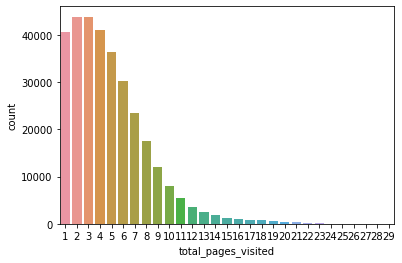

In [8]:
tpv = list(dataset.total_pages_visited.unique())
sorted(tpv, reverse = True)
sns.countplot(x = dataset.total_pages_visited, data = dataset);

In [19]:
dataset[dataset['total_pages_visited'] > 24]

,country,age,new_user,source,total_pages_visited,converted
1104,US,17,0,Direct,25,1
1305,US,25,0,Direct,26,1
1331,US,32,1,Ads,25,1
8010,UK,31,0,Seo,25,1
11167,US,24,0,Seo,27,1
...,...,...,...,...,...,...
290544,US,39,0,Direct,26,1
291110,US,23,1,Ads,26,1
291951,US,21,0,Seo,26,1
297438,Germany,19,0,Direct,25,1


It seems that there are only few observations (66 ones) with total pages visited above 24. We can consider these lines outliers and delete it.

# STEP #2: VISUALIZE DATA

## 2.1 Overall visualization and correlation

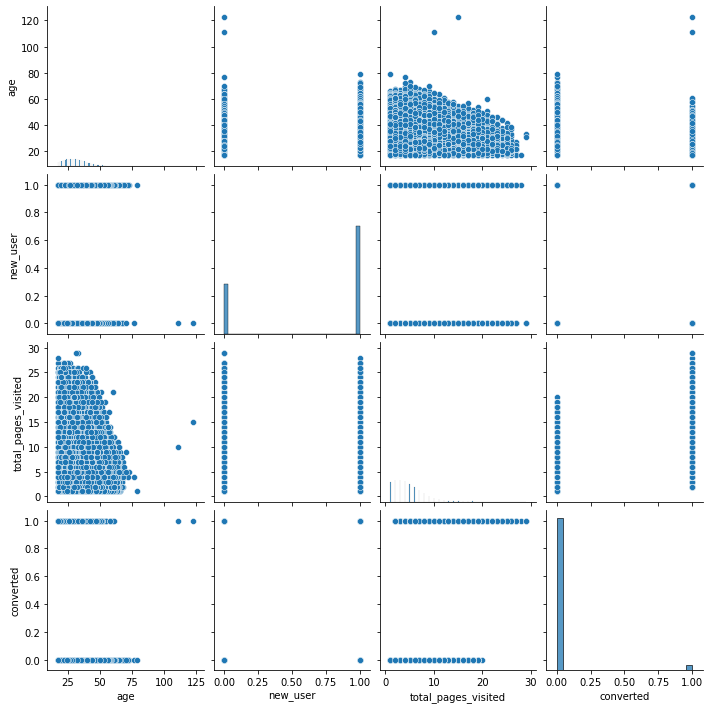

In [7]:
sns.pairplot(dataset);

- It seems that converted customers : are younger and visit more pages. 
- We need to treat the distribution of the age and total pages visited before fitting the model
- The number of converted is very small

In [23]:
# Let's exclude outliers and filter the dataset on Age below 111 and total pages visited above 25 

dataset = dataset[ (dataset.age < 110) & (dataset.total_pages_visited < 25) ]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316132 entries, 0 to 316199
Data columns (total 6 columns):
country                316132 non-null object
age                    316132 non-null int64
new_user               316132 non-null int64
source                 316132 non-null object
total_pages_visited    316132 non-null int64
converted              316132 non-null int64
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


We now have roughly 800 less observations

C:\Users\Soudia\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Soudia\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


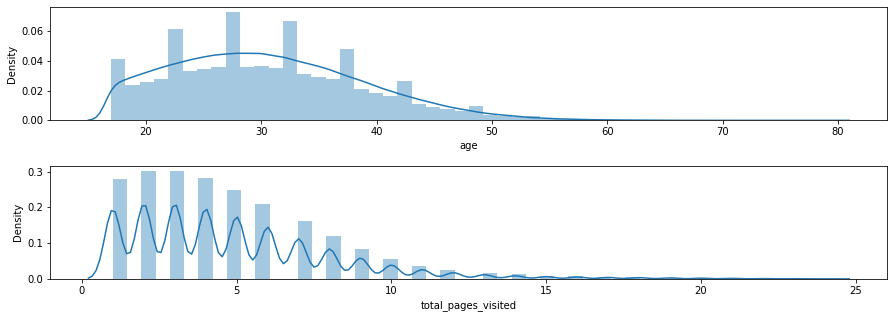

In [24]:
#  filtered dataset
# we have a better distribution of age and total pages visited

plt.figure(figsize =( 15, 5))

plt.subplot(2 ,1 ,1 )
sns.distplot(dataset.age)
plt.xlabel('age')

plt.subplot(2 ,1 ,2 )
sns.distplot(dataset.total_pages_visited)

plt.subplots_adjust(hspace = 0.4)

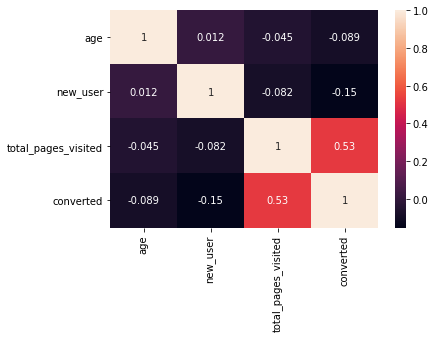

In [25]:
sns.heatmap(dataset.corr(), annot = True);
 

We have **53% correlation between conversion and total pages visited, and 15% with new_user and 9 % with age**

In [12]:
dataset.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [27]:
# let's dummify categorical features in order to analyze correlation

dum_features = ['country', 'source']
other_variables = ['age', 'new_user', 'total_pages_visited','converted']

dum_data = pd.get_dummies(dataset[dum_features])

dataset_dummified = pd.concat([dum_data, 
                               dataset[other_variables] 
                              ], axis = 1)
dataset_dummified.head()

,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo,age,new_user,total_pages_visited,converted
0,0,0,1,0,1,0,0,25,1,1,0
1,0,0,0,1,0,0,1,23,1,5,0
2,0,0,0,1,0,0,1,28,1,4,0
3,1,0,0,0,0,0,1,39,1,5,0
4,0,0,0,1,0,0,1,30,1,6,0


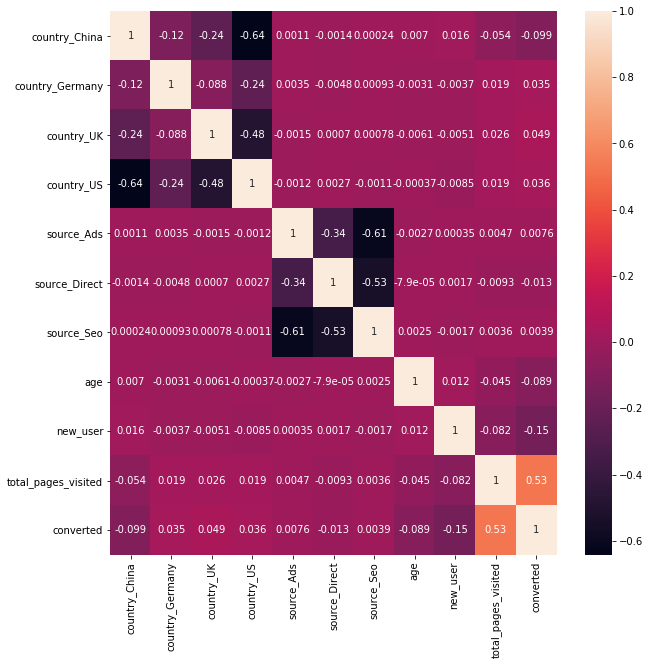

In [28]:
plt.figure( figsize = (10, 10))
sns.heatmap(dataset_dummified.corr(), annot = True);

 

We don't get further significant correlation. We can note that China is negatively correlated to conversion.

## 2.2 Each variable correlation with conversion

In [30]:
columns = dataset.columns[:-1]
columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')

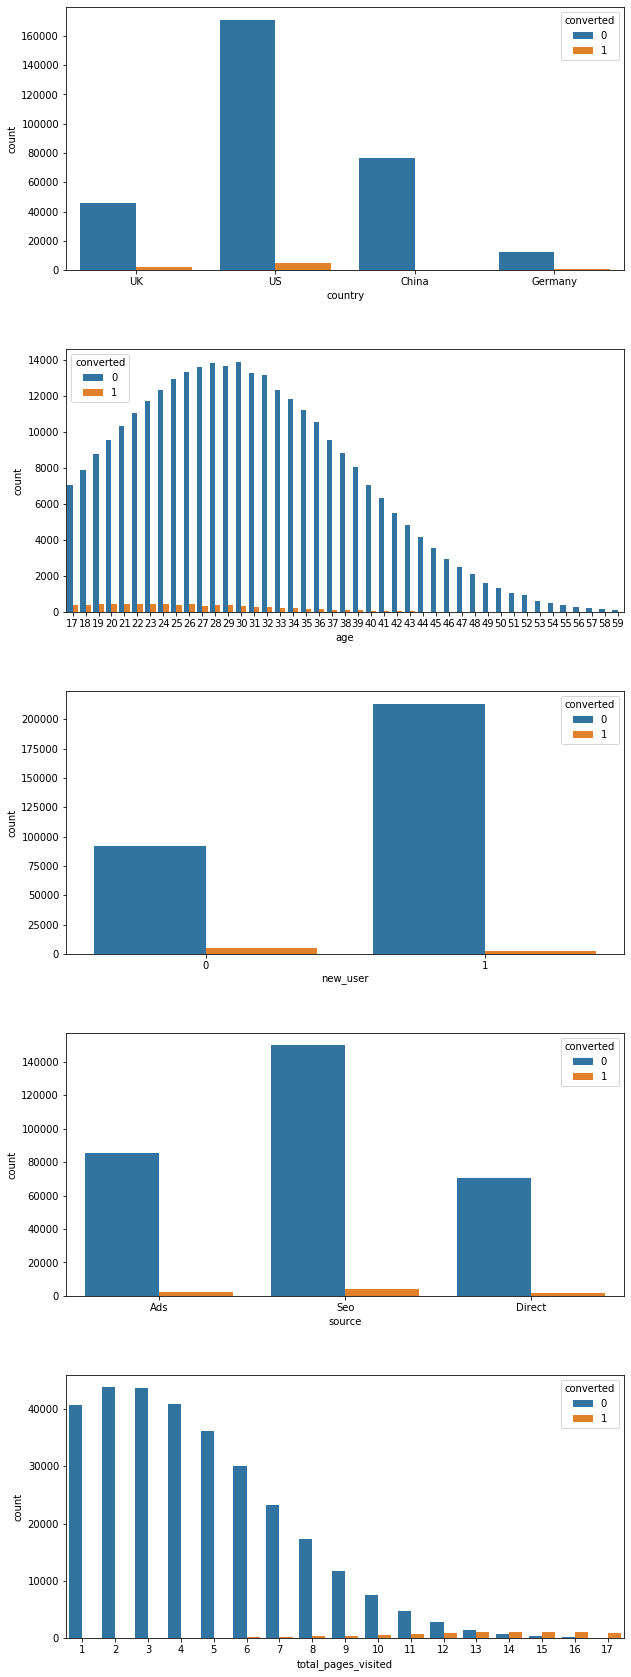

In [16]:

fig, axes = plt.subplots( nrows = 5, ncols = 1, figsize = (10,30))

for col, ax in zip(columns, axes.flat) : 
    sns.countplot(x = dataset[col], hue = dataset.converted, ax = ax)
    
plt.subplots_adjust(hspace = 0.3);

We notice one more time that converted customers are too rare. However, we can see that in terms of count :  
- There are more visitors and converted custumers in US (maybe because its a mature markets)
- There more visitors in China than UK and Germany but less converted customers. There could be an issue with the Chinese version of the website.
- Most customers are young people (below 33 roughly) and are not new users
- A converted customer visit more than 9 pages roughly. The conversion rate is significantly highler with 12 and more pages visited
- The source doesn't seem to have an influence on conversion. For each source, the number of converted look propotional to the total number of users.

In [33]:
dataset_converted = dataset[dataset.converted == 1 ]
dataset_non_converted = dataset[dataset.converted == 0 ]

C:\Users\Soudia\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\Soudia\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\Soudia\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\Soudia\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\Soudia\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not ac

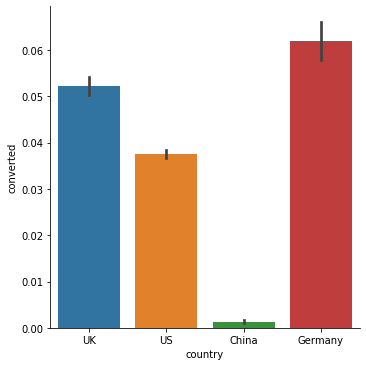

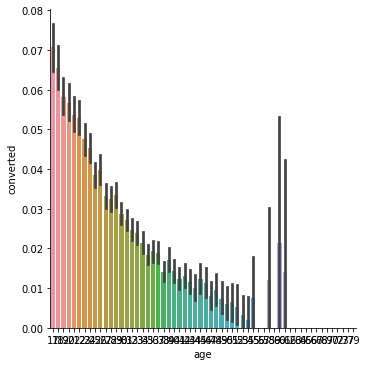

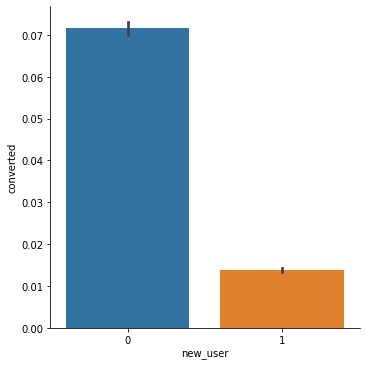

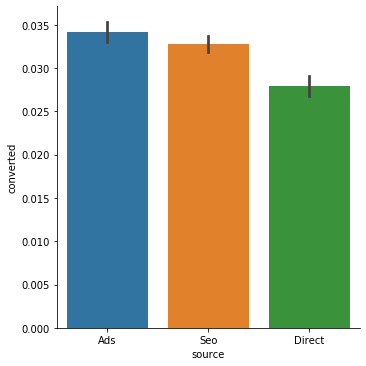

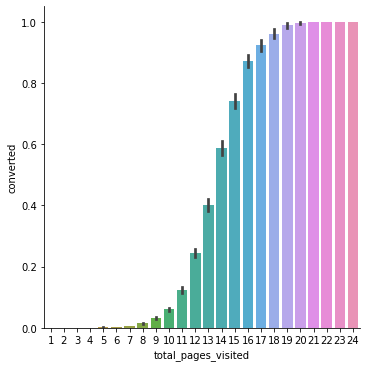

In [44]:
#fig, axes = plt.subplots( nrows = 5, ncols = 1, figsize = (10,30))

for col, ax in zip(columns, axes.flat) : 
    
    sns.catplot(x = dataset[col], y = 'converted', data = dataset, kind = 'bar' , ax = ax)
    
plt.subplots_adjust(hspace = 0.3);

- It looks likes the conversion rate is very strong in Germany, even though the number if visitors is low (it's the market with the lowest number of visitors). It looks likes Germany present a big opportunity for growth ! 
- Meanwhile, in China, the conversion rate is very low, despite a high number of visitors. Maybe the website or the products are not adapted to Chinese customers

### 2.3  **We would like to see the conversion rate (converted / total visitors) grouped by the number total of visited pages TPV**

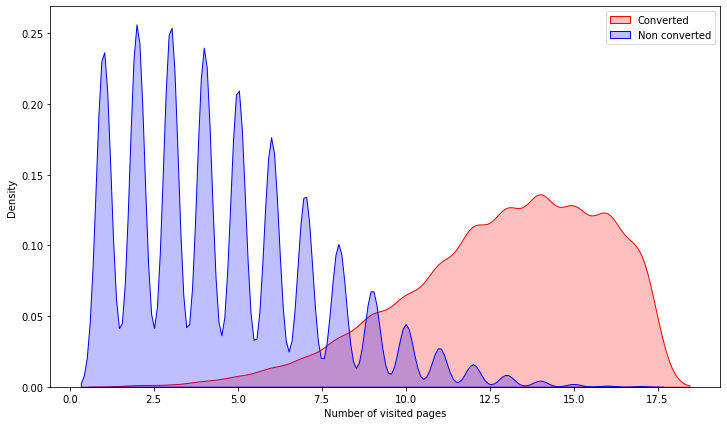

In [18]:
plt.figure(figsize=(12,7))

sns.kdeplot(dataset_converted['total_pages_visited'], label = 'Converted', shade = True, color = 'r')
sns.kdeplot(dataset_non_converted['total_pages_visited'], label = 'Non converted', shade = True, color = 'b')

plt.xlabel('Number of visited pages')
plt.legend();

In [46]:
tpv_converted = dataset_converted.groupby(by = 'total_pages_visited')[['converted', 'new_user']].sum()

# total number of customers grouped by number of visited pages
tpv_all = dataset.groupby(by = 'total_pages_visited')['country'].count() 


tpv_all = pd.concat( [tpv_converted,tpv_all ],axis = 1) 
tpv_all.columns = ['Converted_count', 'Converted new users','Total customers']

tpv_all['conversion_rate %'] = np.round((tpv_all['Converted_count'] / tpv_all['Total customers'])*100,2)
tpv_all.tail(10)


,Converted_count,Converted new users,Total customers,conversion_rate %
total_pages_visited,,,,
15,980.0,291.0,1324,74.02
16,959.0,313.0,1100,87.18
17,780.0,239.0,845,92.31
18,694.0,196.0,722,96.12
19,559.0,183.0,565,98.94
20,404.0,134.0,405,99.75
21,296.0,85.0,296,100.00
22,180.0,54.0,180,100.00
23,113.0,38.0,113,100.00


**With 14 pages visited and above, there are more than 50% chances that the customer buys something.**

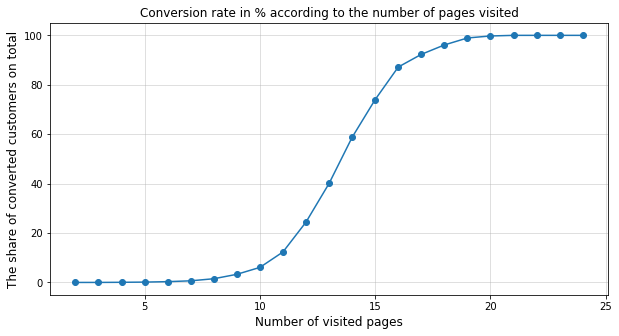

In [47]:
ax = plt.figure(figsize = (10,5))
plt.plot(tpv_all['conversion_rate %'], marker = 'o')

plt.grid(alpha = 0.5)

plt.title('Conversion rate in % according to the number of pages visited')
plt.ylabel('The share of converted customers on total', size =12)
plt.xlabel('Number of visited pages', size =12);

### 2.4  **We would like to see the conversion rate (converted / total visitors) grouped by age**

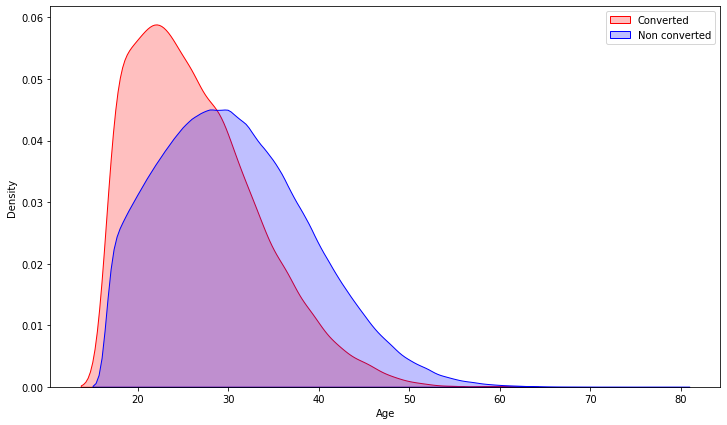

In [48]:
plt.figure(figsize=(12,7))

sns.kdeplot(dataset_converted['age'], label = 'Converted', shade = True, color = 'r')
sns.kdeplot(dataset_non_converted['age'], label = 'Non converted', shade = True, color = 'b')

plt.xlabel('Age')
plt.legend();

In [50]:
age_converted = dataset_converted.groupby(by = 'age')[['converted', 'new_user']].sum()

# total number of customers grouped by age
age_all = dataset.groupby(by = 'age')['country'].count() 


age_all = pd.concat( [age_converted, age_all ],axis = 1) 
age_all.columns = ['Converted_count', 'Converted new users','Total customers']

age_all['conversion_rate %'] = np.round((age_all['Converted_count'] / age_all['Total customers'])*100,2)


In [52]:
age_all['Cumulated_conversion_rate'] = age_all['conversion_rate %'].cumsum()
age_all.head(10)

,Converted_count,Converted new users,Total customers,conversion_rate %,Cumulated_conversion_rate
age,,,,,
17,538.0,154.0,7591,7.09,7.09
18,555.0,179.0,8462,6.56,13.65
19,544.0,160.0,9345,5.82,19.47
20,576.0,165.0,10152,5.67,25.14
21,587.0,189.0,10961,5.36,30.50
22,618.0,202.0,11696,5.28,35.78
23,587.0,157.0,12331,4.76,40.54
24,587.0,171.0,12958,4.53,45.07
25,518.0,146.0,13456,3.85,48.92


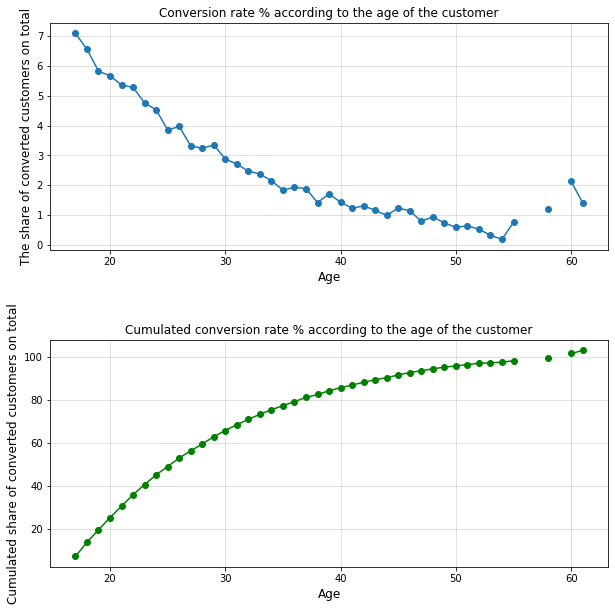

In [53]:
plt.figure(figsize = (10,10)) 

plt.subplot(211) 

plt.plot(age_all['conversion_rate %'], marker = 'o')
plt.grid(alpha = 0.5)

plt.title('Conversion rate % according to the age of the customer')
plt.ylabel('The share of converted customers on total', size =12)
plt.xlabel('Age', size =12)

plt.subplot(212) 

plt.plot(age_all['Cumulated_conversion_rate'], marker = 'o', color = 'g')
plt.grid(alpha = 0.5)

plt.title('Cumulated conversion rate % according to the age of the customer')
plt.ylabel('Cumulated share of converted customers on total', size =12)
plt.xlabel('Age', size =12)

plt.subplots_adjust(hspace = 0.4);

- If the customer has **26 or below**, there are more than **50% chances that the customer buys something**.
- At **30**, the conversion rate is **two times inferior than the one at 17**

In [54]:
# Lets make a sanity check between the original table and the new ones

print('Number of converted customers')
print("Original dataset", dataset.converted.sum())
print("TPV dataset", tpv_all.Converted_count.sum())
print("Age dataset", age_all.Converted_count.sum())

print('\n')
print('Number of new_users converted')
print("Original dataset", dataset[dataset.converted == 1 ].new_user.sum())
print("TPV dataset", tpv_all['Converted new users'].sum())
print("Age dataset", age_all['Converted new users'].sum())

print('\n')
print('Number of total customers')
print("Original dataset", len(dataset))
print("TPV dataset", tpv_all['Total customers'].sum())
print("Age dataset", age_all['Total customers'].sum())

Number of converted customers
Original dataset 10132
TPV dataset 10132.0
Age dataset 10132.0


Number of new_users converted
Original dataset 3018
TPV dataset 3018.0
Age dataset 3018.0


Number of total customers
Original dataset 316132
TPV dataset 316132
Age dataset 316132


###  2.7 Density plot of Converted vs Not converted in terms of age

In [32]:
countries = list(dataset.country.unique())
countries

['UK', 'US', 'China', 'Germany']

In [33]:
dataset_converted = dataset[dataset.converted == 1 ]
dataset_non_converted = dataset[dataset.converted == 0 ]

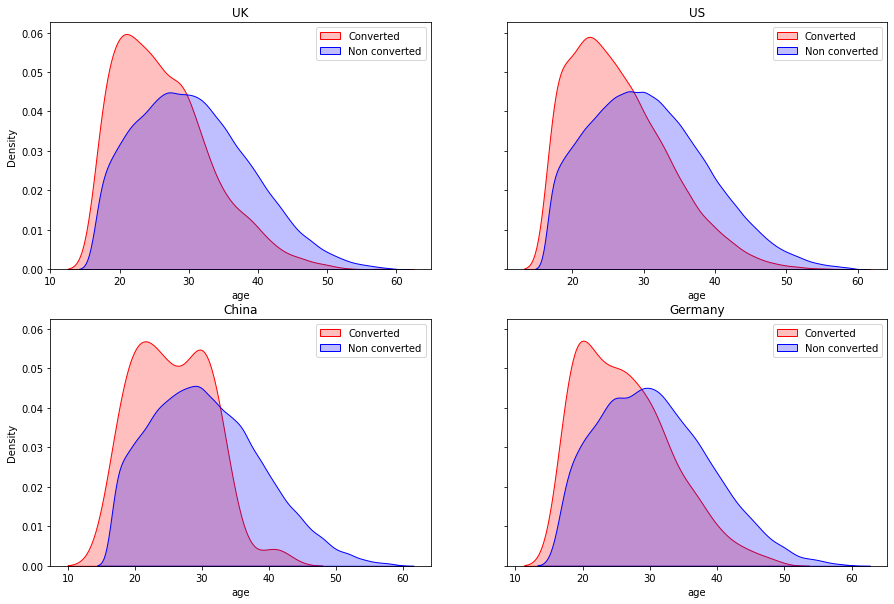

In [34]:
countries = list(dataset.country.unique())
fig, axes = plt.subplots( 2, 2 , figsize = (15, 10), sharey = True)

for country, ax in zip(countries, axes.flat):
    df_conv = dataset_converted[dataset_converted['country'] == country]
    df_not_conv = dataset_non_converted[dataset_non_converted['country'] == country]


    sns.kdeplot(df_conv['age'], label = 'Converted', shade = True, color = 'r', ax = ax)
    sns.kdeplot(df_not_conv['age'], label = 'Non converted', shade = True, color = 'b', ax = ax)

    ax.set_title(country)
    ax.legend();

- China seems different than other countries, there are 2 peaks in terms of age for converted customers : around 20 and 30. 
- Meanwhile, other countries have one peak around 20

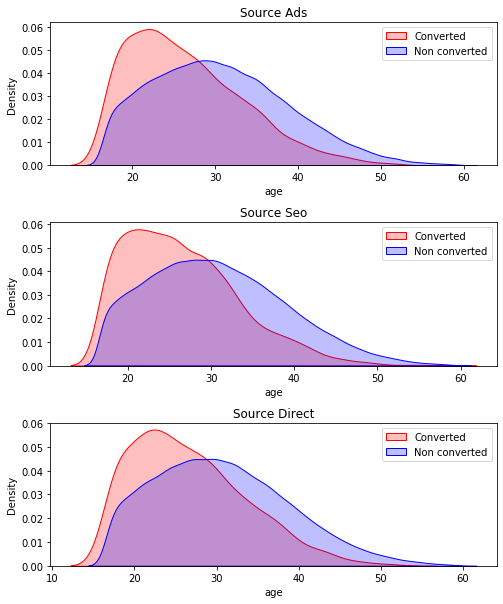

In [35]:
sources = list(dataset.source.unique())
fig, axes = plt.subplots( 3, 1 , figsize = (8, 10))

for srce, ax in zip(sources, axes.flat):
    df_conv = dataset_converted[dataset_converted['source'] == srce]
    df_not_conv = dataset_non_converted[dataset_non_converted['source'] == srce]


    sns.kdeplot(df_conv['age'], label = 'Converted', shade = True, color = 'r', ax = ax)
    sns.kdeplot(df_not_conv['age'], label = 'Non converted', shade = True, color = 'b', ax = ax)

    ax.set_title('Source {}'.format(srce))
    ax.legend()

plt.subplots_adjust(hspace = 0.4);

- SEO seems the best to target the acquisition of customers between 25 and 30.

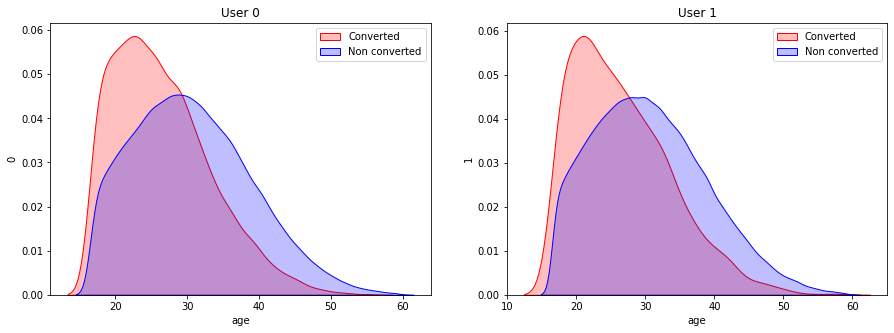

In [36]:
new_user = [0,1]
fig, axes = plt.subplots( 1, 2 , figsize = (15,5 ))

for user, ax in zip(new_user, axes.flat):
    df_conv = dataset_converted[dataset_converted['new_user'] == user]
    df_not_conv = dataset_non_converted[dataset_non_converted['new_user'] == user]


    sns.kdeplot(df_conv['age'], label = 'Converted', shade = True, color = 'r', ax = ax)
    sns.kdeplot(df_not_conv['age'], label = 'Non converted', shade = True, color = 'b', ax = ax)
    
    ax.set_title('User {}'.format(user))
    ax.set_ylabel(user)
    ax.legend();

- It seems that existing converted customers (User = 0) are more distributed in terms of age. So if there is a new user (User = 1), his chances of buying are greater if he is young. 
- We could recommand the marketing team to target the acquisition of young people (around 20) or to improve the experience of new user aged between 25 or 30 on the website.

### 2.8 Density plot of converted vs not converted in terms of pages visited

In [37]:
dataset.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

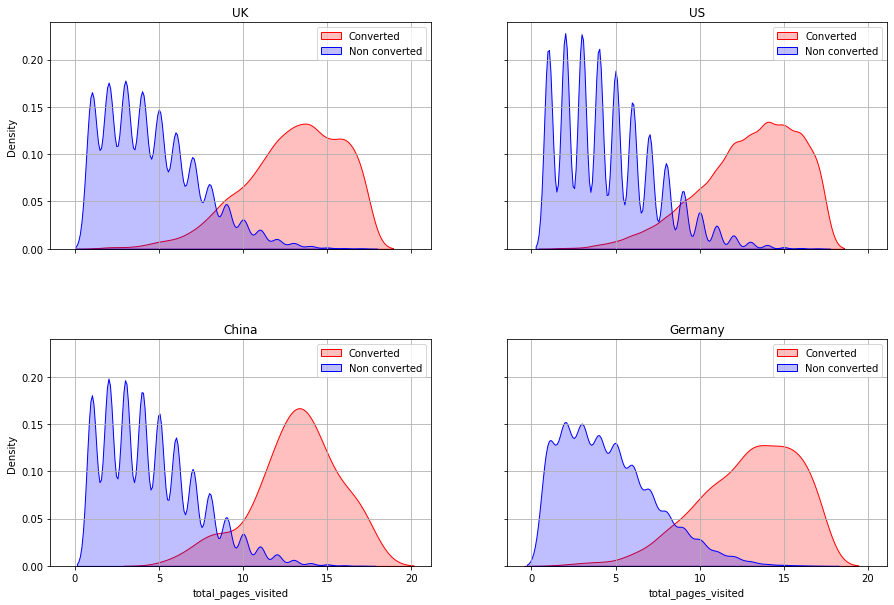

In [38]:
countries = list(dataset.country.unique())
fig, axes = plt.subplots( 2, 2 , figsize = (15, 10), sharex = True, sharey = True)

for country, ax in zip(countries, axes.flat):
    df_conv = dataset_converted[dataset_converted['country'] == country]
    df_not_conv = dataset_non_converted[dataset_non_converted['country'] == country]


    sns.kdeplot(df_conv['total_pages_visited'], label = 'Converted', shade = True, color = 'r', ax = ax)
    sns.kdeplot(df_not_conv['total_pages_visited'], label = 'Non converted', shade = True, color = 'b', ax = ax)

    ax.set_title(country)
    ax.legend()
    ax.grid()

plt.subplots_adjust(hspace = 0.4);

- Once again, we see **a common pattern in the UK, US and Germany**. The density of the TPV is quite similar : between 12 and 17 pages
- Meanwhile, **in China there is less variance among converted customers**, most of them visit 13 pages roughly. In China, converted customers need to visit less pages before buying overall.

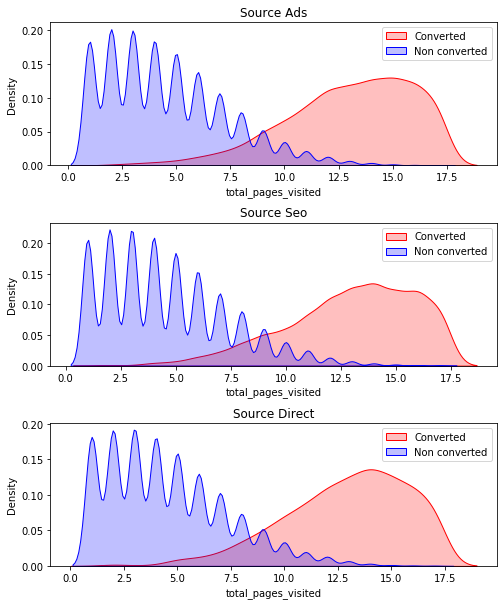

In [39]:
sources = list(dataset.source.unique())
fig, axes = plt.subplots( 3, 1 , figsize = (8, 10))

for srce, ax in zip(sources, axes.flat):
    df_conv = dataset_converted[dataset_converted['source'] == srce]
    df_not_conv = dataset_non_converted[dataset_non_converted['source'] == srce]


    sns.kdeplot(df_conv['total_pages_visited'], label = 'Converted', shade = True, color = 'r', ax = ax)
    sns.kdeplot(df_not_conv['total_pages_visited'], label = 'Non converted', shade = True, color = 'b', ax = ax)

    ax.set_title('Source {}'.format(srce))
    ax.legend()

plt.subplots_adjust(hspace = 0.4);

The source doesn't seem to impact the number of visited pages.

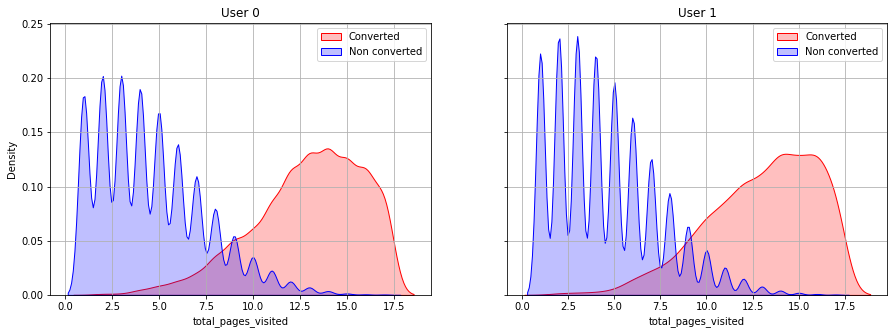

In [40]:
new_user = [0,1]
fig, axes = plt.subplots( 1, 2 , figsize = (15,5 ), sharey = True)

for user, ax in zip(new_user, axes.flat):
    df_conv = dataset_converted[dataset_converted['new_user'] == user]
    df_not_conv = dataset_non_converted[dataset_non_converted['new_user'] == user]


    sns.kdeplot(df_conv['total_pages_visited'], label = 'Converted', shade = True, color = 'r', ax = ax)
    sns.kdeplot(df_not_conv['total_pages_visited'], label = 'Non converted', shade = True, color = 'b', ax = ax)
    
    ax.set_title('User {}'.format(user))
    ax.legend()
    ax.grid();

This graph confirms what we saw previously, there are more people among new users that visit more than 14 pages. Probably because they need to seek more information.

# STEP #3: DATA PREPARATION

In [22]:
dataset = pd.read_csv('conversion_data.csv')
dataset = dataset[ (dataset.age < 110) & (dataset.total_pages_visited < 25) ]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316132 entries, 0 to 316199
Data columns (total 6 columns):
country                316132 non-null object
age                    316132 non-null int64
new_user               316132 non-null int64
source                 316132 non-null object
total_pages_visited    316132 non-null int64
converted              316132 non-null int64
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


In [23]:
dataset = dataset.reset_index()

### 3.1 Let's treat categorical variables and Normalize numerical variables

In [25]:
# let's dummify categorical features in order to analyze correlation

dum_features = ['country', 'source']

dum_data = pd.get_dummies(dataset[dum_features])

dum_data


,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,1,0,0,0,0,0,1
4,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...
316127,0,0,0,1,1,0,0
316128,0,0,0,1,0,1,0
316129,1,0,0,0,1,0,0
316130,0,0,0,1,0,0,1


In [26]:
# let's Normalize Numerical variables
numerical_var = dataset[['age', 'total_pages_visited']]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(numerical_var)
X = pd.DataFrame(X, columns = ['age', 'total_pages_visited'])
#print(len(X))
X_all = pd.concat([X, dum_data, dataset['new_user']], axis = 1)
print(len(X_all))
X_all.head()


316132


,age,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo,new_user
0,0.129032,0.000000,0,0,1,0,1,0,0,1
1,0.096774,0.173913,0,0,0,1,0,0,1,1
2,0.177419,0.130435,0,0,0,1,0,0,1,1
3,0.354839,0.173913,1,0,0,0,0,0,1,1
4,0.209677,0.217391,0,0,0,1,0,0,1,1


In [27]:
dataset.columns

Index(['index', 'country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [28]:
len(X_all)

316132

In [29]:
y = dataset['converted']
len(y)

316132

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.2, random_state = 2, shuffle = True, stratify = y)

In [31]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

252905
252905
63227
63227


### 3.2 Let's make data more balanced thanks to an UnderSampler. The number of observations will be equal among converted and non-converted.


In [ ]:
#conda install -c glemaitre imbalanced-learn

In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled_under, y_resampled_under =rus.fit_resample(X_train, y_train)

In [42]:
print(X_resampled_under.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16212 entries, 0 to 16211
Data columns (total 10 columns):
age                    16212 non-null float64
total_pages_visited    16212 non-null float64
country_China          16212 non-null uint8
country_Germany        16212 non-null uint8
country_UK             16212 non-null uint8
country_US             16212 non-null uint8
source_Ads             16212 non-null uint8
source_Direct          16212 non-null uint8
source_Seo             16212 non-null uint8
new_user               16212 non-null int64
dtypes: float64(2), int64(1), uint8(7)
memory usage: 490.9 KB
None


C:\Users\Soudia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


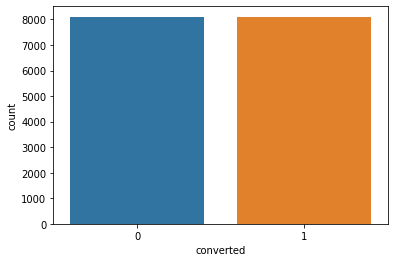

In [43]:
sns.countplot(y_resampled_under);

# STEP #4: TRAIN THE MODELS

## 4.1 Logistic Regression

- Let's create a function that will fit the Logistic Regression model according to selected columns. 
- Let's see which columns improve the score and the detection of True Positives.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

def train_test(columns):
    model = LogisticRegression()
    model.fit(X_resampled_under[columns], y_resampled_under)
    pred = model.predict(X_test[columns])
    print('Accuracy score', accuracy_score(y_test, pred) )
    print('Classification report Logistic Regression: \n', classification_report(y_test, pred))
    print('Confusion matrix Logistic Regression: \n', confusion_matrix(y_test, pred))

In [79]:
train_test(['new_user','age'])

Accuracy score 0.7353029560156262
Classification report Logistic Regression: 
               precision    recall  f1-score   support

           0       0.99      0.74      0.84     61201
           1       0.08      0.67      0.14      2026

    accuracy                           0.74     63227
   macro avg       0.53      0.70      0.49     63227
weighted avg       0.96      0.74      0.82     63227

Confusion matrix Logistic Regression: 
 [[45139 16062]
 [  674  1352]]


In [76]:
train_test(['new_user','age','total_pages_visited'])

Accuracy score 0.9401679662169643
Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     61201
           1       0.34      0.93      0.50      2026

    accuracy                           0.94     63227
   macro avg       0.67      0.93      0.73     63227
weighted avg       0.98      0.94      0.95     63227

Confusion matrix : 
 [[57563  3638]
 [  145  1881]]


In [70]:
# all columns
train_test(['age', 'total_pages_visited', 'country_China', 'country_Germany',
       'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo',
       'new_user'])

Accuracy score 0.9448969585778227
Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     61201
           1       0.36      0.94      0.52      2026

    accuracy                           0.94     63227
   macro avg       0.68      0.94      0.75     63227
weighted avg       0.98      0.94      0.96     63227

Confusion matrix : 
 [[57843  3358]
 [  126  1900]]


If we use fit all columns (3rd model), we get an accuracy score of 94%. It is similar to the 2nd model where only 3 columns are fit with the strongest variables : total pages visited, age and new user.

3rd model : 
The number of True Positive detected is 1900, so the model detected almost all True customers (94% of them) but it got 64% predicted wrong. (100% - 36% = 64%).

## 4.2 Support Vector Machine

- The linear SVM classifier works by drawing a straight line between two classes. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second.
- SVMs are able to deal with datasets with imbalanced class frequencies
- This model can take some time to get the best parameters 

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.2, random_state = 2, shuffle = True, stratify = y)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

252905
252905
63227
63227


In [81]:
from sklearn.svm import SVC
svm = SVC(C = 0.1 , kernel = 'rbf' , gamma = 1)
svm.fit(X_train, y_train)
%time

Wall time: 3.5 ms


In [84]:
svm_pred = svm.predict(X_test)
print('Classification report SVM : \n', classification_report(y_test, svm_pred))
print('Confusion matrix SVM : \n', confusion_matrix(y_test, svm_pred))
%time

Classification report SVM : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     61201
           1       0.89      0.60      0.72      2026

    accuracy                           0.98     63227
   macro avg       0.94      0.80      0.85     63227
weighted avg       0.98      0.98      0.98     63227

Confusion matrix SVM : 
 [[61055   146]
 [  811  1215]]
Wall time: 0 ns


SVM model found less True positives (only 1215) that Logistic Regression (1900). **However, the precision with SVM is much higher with 89% !** So there is 89% that Trues predicted are correct. 

**If the primary objective is to get precise predictions, then SVM looks better than Logistic Regression.**

In [85]:
from sklearn.model_selection import GridSearchCV

C = [0.01, 0.1]
#gamma = [0.1, 1 ]


hyperF = dict(C = C )
gridF = GridSearchCV(svm, hyperF)
bestF = gridF.fit(X_train, y_train)
print(gridF.best_params_)
grid_predictions = gridF.predict(X_test)

print(confusion_matrix(grid_predictions, y_test))
print(classification_report(grid_predictions, y_test))

%time
# it takes too long to retrieve

KeyboardInterrupt: 

## 4.3 Random Forest Classifier

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes (a majority vote) from different decision trees.

A decision tree alone might not be precise, however the accuracy increase as many trees are being fit.

It usually requires very little time to optimize it (its default params are often close to be the best ones) and it is strong with outliers, irrelevant variables, continuous and discrete variables.

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.2, random_state = 2, shuffle = True, stratify = y)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

252905
252905
63227
63227


We will use a limited depth in order to have a good interpretability of the model and to avoid overfitting.

In [95]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth = 3)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

''

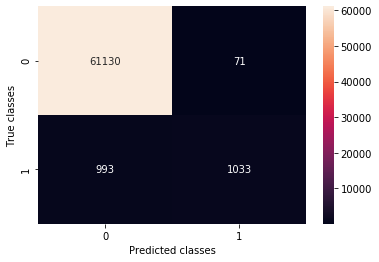

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
;

In [97]:
print(classification_report(y_test, pred))
# Among classes predicted True, 88% are correct
# 66% of True Converted were predicted True

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     61201
           1       0.94      0.51      0.66      2026

    accuracy                           0.98     63227
   macro avg       0.96      0.75      0.83     63227
weighted avg       0.98      0.98      0.98     63227



We got a very good precision 96% at  with RF Classifier. However recall is less good with 51% only. 
There are Only 1033 True Positive. Let's try to adjust parameters. 

We will use the parameter class_weight because it's relevant to our imbalanced dataset.

In [98]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 3, class_weight = {0:1, 1 :10})
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     61201
           1       0.61      0.82      0.70      2026

    accuracy                           0.98     63227
   macro avg       0.80      0.90      0.84     63227
weighted avg       0.98      0.98      0.98     63227

[[60152  1049]
 [  367  1659]]


- We got a better result in terms of Recall (82%) , which means that the model identify almost all True classes. 
- However Precision is much lower at 61% vs the first RF model.
- Overall f1-score has improved vs the first model with 1659 True Positives.

Let's try with Out of bag = True, it uses the out-of-bag samples to estimate the generalization accuracy, which is somehow a validation method. 

In [102]:
# a retriever apres avoir nettoyer le kernel

model = RandomForestClassifier(n_estimators = 100, max_depth = 3, oob_score=True)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     61201
           1       0.91      0.50      0.64      2026

    accuracy                           0.98     63227
   macro avg       0.95      0.75      0.82     63227
weighted avg       0.98      0.98      0.98     63227

[[61103    98]
 [ 1022  1004]]


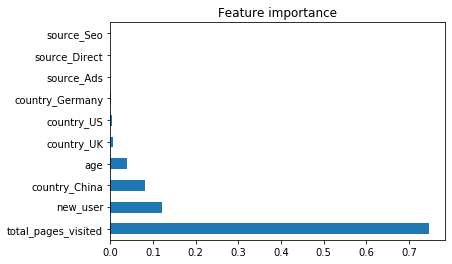

In [111]:
model = RandomForestClassifier(max_depth = 3)
model.fit(X_train, y_train)

features_imp = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns = ['Feature importance']).sort_values(['Feature importance'],ascending= False) 
#print('Random Forest Classifier')
features_imp['Feature importance'].plot(kind = 'barh')
plt.title('Feature importance');

We can see that total pages visited is the most important feature. However, most customers visit many pages because they already want to buy. 

Let's build a model without this feature in order to get a more in-depth view of other features.

In [75]:
X_train.columns

Index(['age', 'total_pages_visited', 'country_China', 'country_Germany',
       'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo',
       'new_user'],
      dtype='object')

[[61201     0]
 [ 2026     0]]


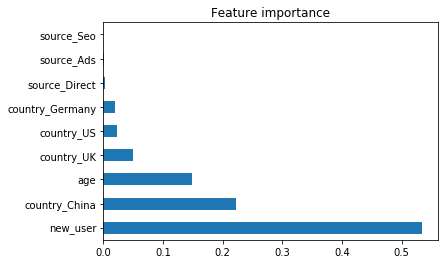

In [94]:
col = ['age', 'country_China', 'country_Germany',
       'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo',
       'new_user']

model = RandomForestClassifier(max_depth = 3)

model.fit(X_train.drop('total_pages_visited', axis = 1), y_train)
y_pred = model.predict(X_test.drop('total_pages_visited', axis = 1))
print(confusion_matrix(y_test, y_pred))

features_imp2 = pd.DataFrame(model.feature_importances_, index = col, columns = ['Feature importance']).sort_values(['Feature importance'],ascending= False) 
features_imp2['Feature importance'].plot(kind = 'barh')
plt.title('Feature importance');

We don't get a better score but we notice the importance of the feature 'New user', which is even more important than age.

### Grid Search CV

In [114]:
from sklearn.model_selection import GridSearchCV

n_estimators = [10, 20, 50]
max_depth = [3, 4, 5]


hyperF = dict(n_estimators = n_estimators, max_depth = max_depth)
gridF = GridSearchCV(model, hyperF)
bestF = gridF.fit(X_train, y_train)

{'max_depth': 3, 'n_estimators': 50}


''

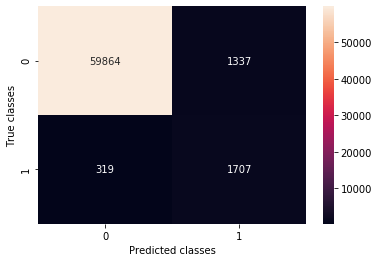

In [115]:
print(gridF.best_params_)
grid_predictions = gridF.predict(X_test)

cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
;


It seems like increasing the number of trees doesn't improve the model. 

## 4.4 DecisionTree

In [127]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

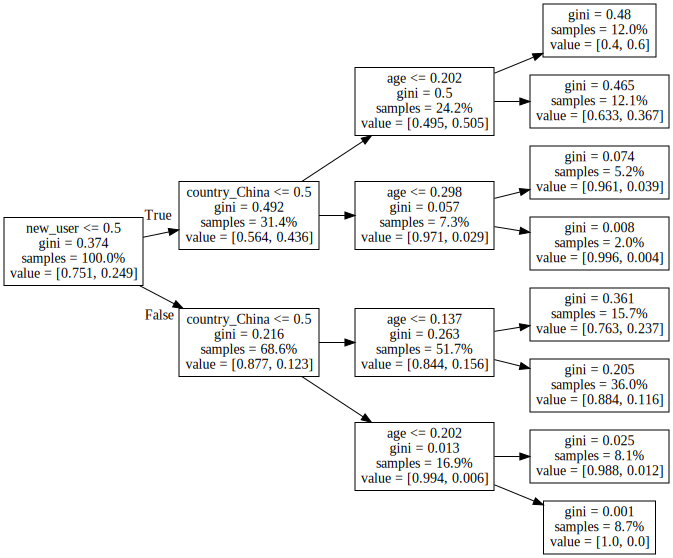

In [132]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(max_depth = 3, class_weight = { 0:1, 1:10})
tree.fit( X_train.drop('total_pages_visited',axis = 1), y_train)

dot_data = export_graphviz(tree, feature_names = col, proportion = True, rotate=True)
graph = graphviz.Source(dot_data)
graph

# value represent the repartition of predicted costumers among the 2 classes
# 

## 4.5 XGBoost

In [137]:
from xgboost import XGBClassifier
import xgboost as xgb

boost = XGBClassifier()
boost.fit(X_train, y_train)
predict_boost = boost.predict(X_test)

[22:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [139]:
print(confusion_matrix(predict_boost, y_test))
print(classification_report(predict_boost, y_test))

[[60940   653]
 [  261  1373]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     61593
           1       0.68      0.84      0.75      1634

    accuracy                           0.99     63227
   macro avg       0.84      0.91      0.87     63227
weighted avg       0.99      0.99      0.99     63227



We obtain a good f1-score of 75% for class 1!  It's better than Random Forest Classifier

### 4.5 Artificial Neuron network

In [ ]:
X_train, y_train = X_train.asarray(), y_train.asarray()

In [ ]:
import tensorflow as tf

model_ann = tf.keras.models.Sequential()
model_ann(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape(8,)))
model_ann(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model_ann(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model_ann(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model_ann.compile(optimizer = 'Adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

In [ ]:
epochs_hist = model_ann.fit(X_train, y_train, epochs = 100, batch_size = 50)

# STEP #5: EVALUATE THE MODELS